In [1]:
# import packages
using LinearAlgebra
using Distributions
using PyPlot
using PGFPlotsX
using LaTeXStrings
using Contour
using CSV
using DataFrames

In [2]:
data_vbp        = CSV.read("data/boston-vbp.csv", DataFrame)
data_bbb_global = CSV.read("data/boston-bbb-global.csv", DataFrame)
data_bbb_local  = CSV.read("data/boston-bbb-local.csv", DataFrame);

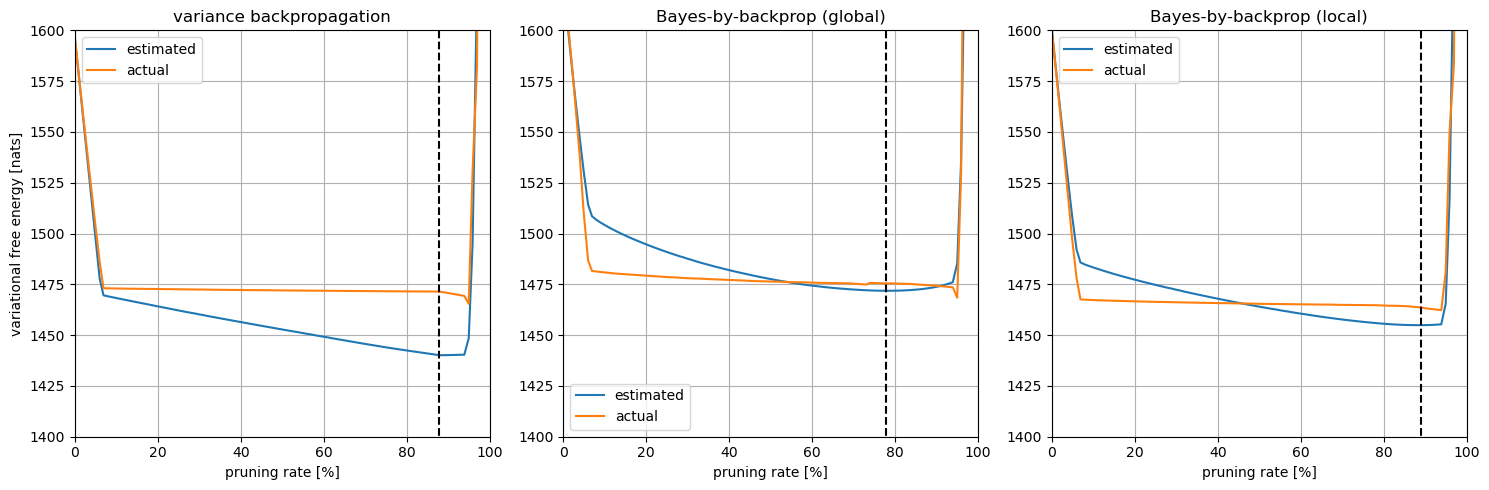

In [3]:
# plot results
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
ax[1].plot(data_vbp[!, "fraction"].*100, data_vbp[!, "theoretical bmr"], label="estimated")
ax[1].plot(data_vbp[!, "fraction"].*100, data_vbp[!, "observed bmr"], label="actual")
ax[1].plot(data_vbp[argmin(data_vbp[!, "theoretical bmr"]), "fraction"] * 100 * ones(2), [0,5000], color="black", linestyle="--")
ax[2].plot(data_bbb_global[!, "fraction"].*100, data_bbb_global[!, "theoretical bmr"], label="estimated")
ax[2].plot(data_bbb_global[!, "fraction"].*100, data_bbb_global[!, "observed bmr"], label="actual")
ax[2].plot(data_bbb_global[argmin(data_bbb_global[!, "theoretical bmr"]), "fraction"] * 100 * ones(2), [0,5000], color="black", linestyle="--")
ax[3].plot(data_bbb_local[!, "fraction"].*100, data_bbb_local[!, "theoretical bmr"], label="estimated")
ax[3].plot(data_bbb_local[!, "fraction"].*100, data_bbb_local[!, "observed bmr"], label="actual")
ax[3].plot(data_bbb_local[argmin(data_bbb_local[!, "theoretical bmr"]), "fraction"] * 100 * ones(2), [0,5000], color="black", linestyle="--")
ax[1].set_title("variance backpropagation"), ax[2].set_title("Bayes-by-backprop (global)"), ax[3].set_title("Bayes-by-backprop (local)")
ax[1].set_ylabel("variational free energy [nats]")
ax[1].set_xlabel("pruning rate [%]")
ax[2].set_xlabel("pruning rate [%]")
ax[3].set_xlabel("pruning rate [%]")
ax[1].grid(), ax[2].grid(), ax[3].grid()
ax[1].set_xlim(0, 100), ax[2].set_xlim(0, 100), ax[3].set_xlim(0, 100)
ax[1].set_ylim(1400, 1600), ax[2].set_ylim(1400, 1600), ax[3].set_ylim(1400, 1600)
ax[1].legend(), ax[2].legend(), ax[3].legend()
plt.tight_layout()

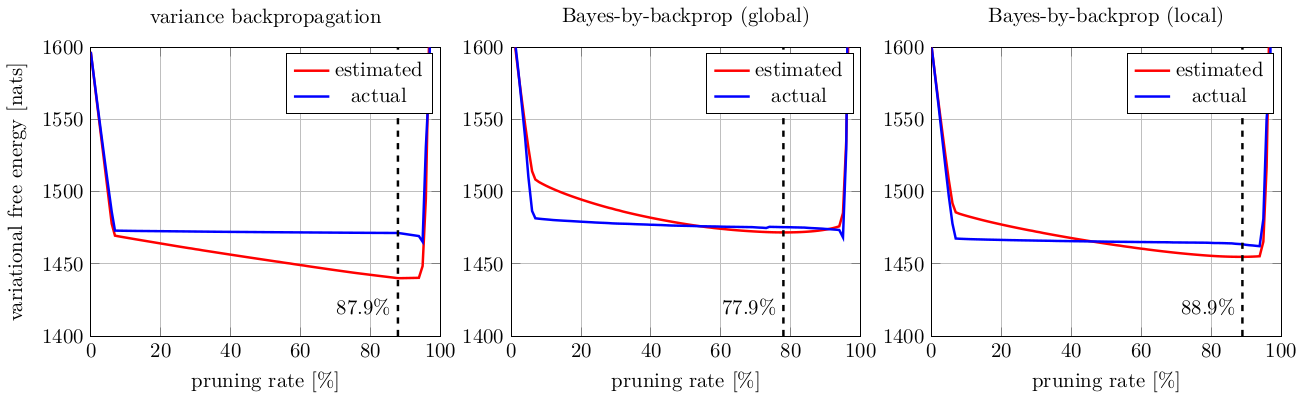

In [4]:
plt_divergence = @pgf GroupPlot(
    # group plot options
    {
        group_style = {
            group_size = "3 by 1",
            horizontal_sep = "1.2cm",
        },
        width = "7.5cm"
    },

    # axis 1 (variance backpropagation)
    {
        xlabel=raw"pruning rate [\%]",
        ylabel=raw"variational free energy [nats]",
        title = "variance backpropagation",
        ymin = 1400,
        ymax = 1600,
        xmin = 0,
        xmax = 100,
        y_tick_label_style = {
            "/pgf/number_format/1000_sep" = "",
        },
        grid = "major",
    },
    # plots for axis 1
    Plot(
        {
            very_thick,
            color = "red"
        },
        Table(
            x = data_vbp[!, "fraction"] .* 100,
            y = data_vbp[!, "theoretical bmr"],
        )
    ),
    LegendEntry("estimated"),
    Plot(
        {
            very_thick,
            color = "blue"
        },
        Table(
            x = data_vbp[!, "fraction"] .* 100,
            y = data_vbp[!, "observed bmr"],
        )
    ),
    LegendEntry("actual"),
    Plot(
        {
            very_thick,
            color = "black",
            dashed
        },
        Table(
            x = data_vbp[argmin(data_vbp[!, "theoretical bmr"]), "fraction"] * 100 * ones(2),
            y = [1400, 1600],
        )
    ),
    [
        raw"\node ",
        {
            left
        },
        " at ",
        Coordinate(data_vbp[argmin(data_vbp[!, "theoretical bmr"]), "fraction"] * 100, 1420),
        string("{", round(data_vbp[argmin(data_vbp[!, "theoretical bmr"]), "fraction"] * 100; digits=1), "\\%};")
    ],

    # axis 2 (Bayes-by-backprop (global))
    {
        xlabel=raw"pruning rate [\%]",
        title = "Bayes-by-backprop (global)",
        ymin = 1400,
        ymax = 1600,
        xmin = 0,
        xmax = 100,
        y_tick_label_style = {
            "/pgf/number_format/1000_sep" = "",
        },
        grid = "major",
    },
    # plots for axis 2
    Plot(
        {
            very_thick,
            color = "red"
        },
        Table(
            x = data_bbb_global[!, "fraction"] .* 100,
            y = data_bbb_global[!, "theoretical bmr"],
        )
    ),
    LegendEntry("estimated"),
    Plot(
        {
            very_thick,
            color = "blue"
        },
        Table(
            x = data_bbb_global[!, "fraction"] .* 100,
            y = data_bbb_global[!, "observed bmr"],
        )
    ),
    LegendEntry("actual"),
    Plot(
        {
            very_thick,
            color = "black",
            dashed
        },
        Table(
            x = data_bbb_global[argmin(data_bbb_global[!, "theoretical bmr"]), "fraction"] * 100 * ones(2),
            y = [1400, 1600],
        )
    ),
    [
        raw"\node ",
        {
            left
        },
        " at ",
        Coordinate(data_bbb_global[argmin(data_bbb_global[!, "theoretical bmr"]), "fraction"] * 100, 1420),
        string("{", round(data_bbb_global[argmin(data_bbb_global[!, "theoretical bmr"]), "fraction"] * 100; digits=1), "\\%};")
    ],

    # axis 3 (Bayes-by-backprop (local))
    { 
        xlabel=raw"pruning rate [\%]",
        title = "Bayes-by-backprop (local)",
        ymin = 1400,
        ymax = 1600,
        xmin = 0,
        xmax = 100,
        y_tick_label_style = {
            "/pgf/number_format/1000_sep" = "",
        },
        grid = "major",
    },
    # plots for axis 3
    Plot(
        {
            very_thick,
            color = "red"
        },
        Table(
            x = data_bbb_local[!, "fraction"] .* 100,
            y = data_bbb_local[!, "theoretical bmr"],
        )
    ),
    LegendEntry("estimated"),
    Plot(
        {
            very_thick,
            color = "blue",
        },
        Table(
            x = data_bbb_local[!, "fraction"] .* 100,
            y = data_bbb_local[!, "observed bmr"],
        )
    ),
    LegendEntry("actual"),
    Plot(
        {
            very_thick,
            color = "black",
            dashed
        },
        Table(
            x = data_bbb_local[argmin(data_bbb_local[!, "theoretical bmr"]), "fraction"] * 100 * ones(2),
            y = [1400, 1600],
        )
    ),
    [
        raw"\node ",
        {
            left
        },
        " at ",
        Coordinate(data_bbb_local[argmin(data_bbb_local[!, "theoretical bmr"]), "fraction"] * 100, 1420),
        string("{", round(data_bbb_local[argmin(data_bbb_local[!, "theoretical bmr"]), "fraction"] * 100; digits=1), "\\%};")
    ]
)

In [5]:
pgfsave("exports/divergence.tikz", plt_divergence)
pgfsave("exports/divergence.pdf", plt_divergence)